Author: Andy Millian


This file is all my EDA for my project showing everything I explored and the models I ended up making.

In [1]:
#all my imports used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import streamlit as st
import pickle
from sklearn.ensemble import GradientBoostingRegressor

exerciseData = pd.read_csv("gym_members_exercise_tracking.csv")

In [2]:
exerciseData

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [3]:
exerciseData.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


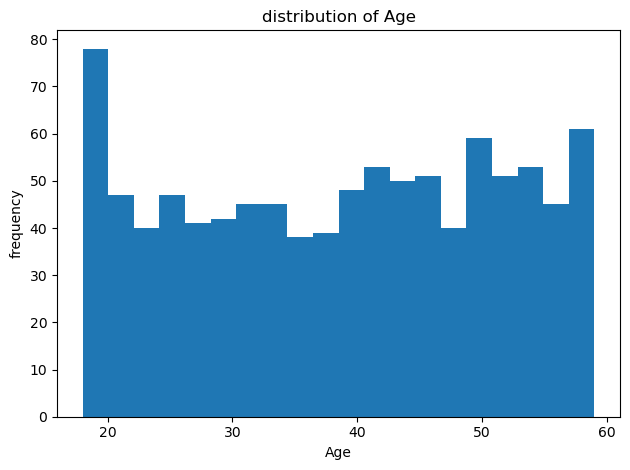

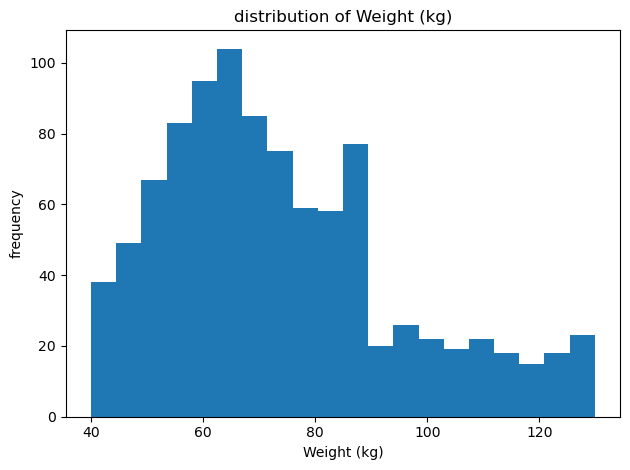

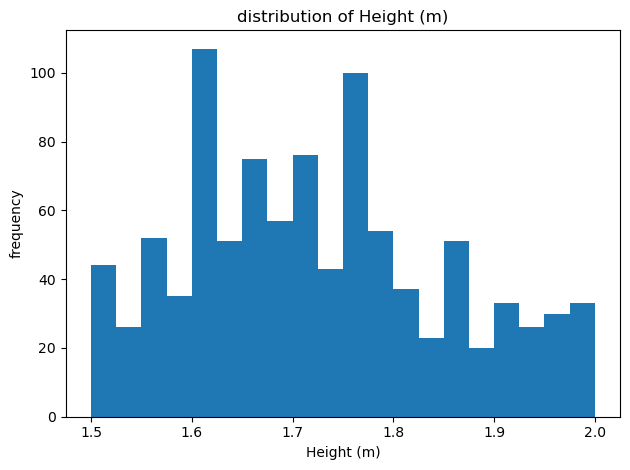

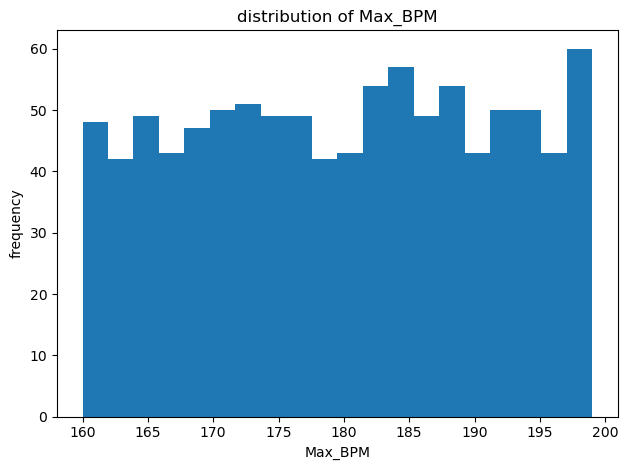

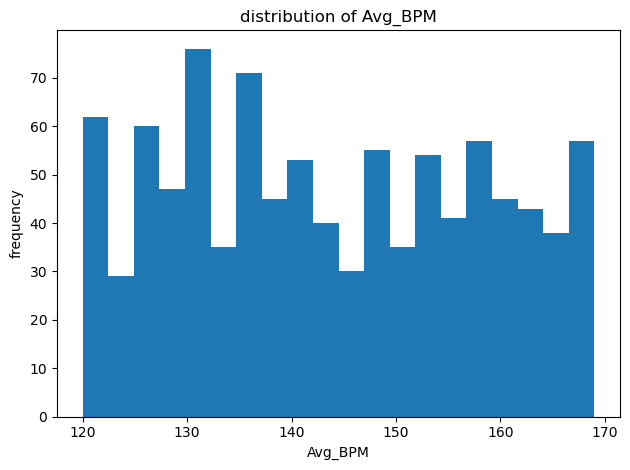

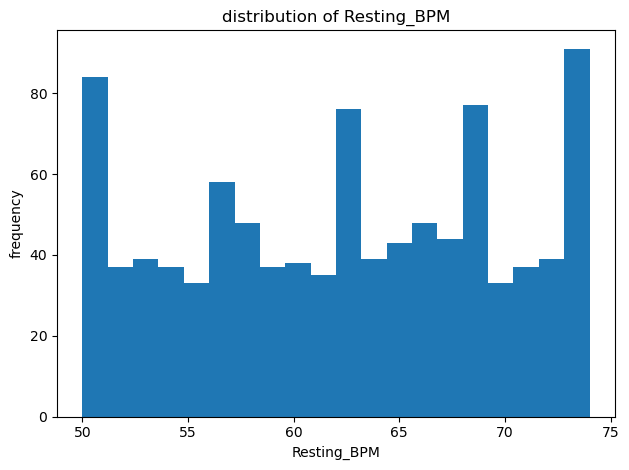

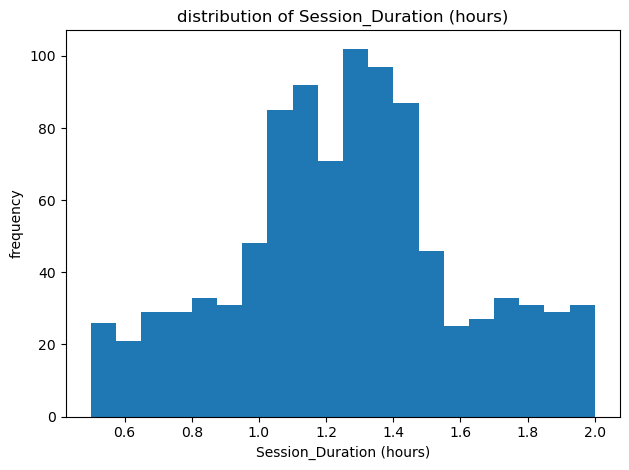

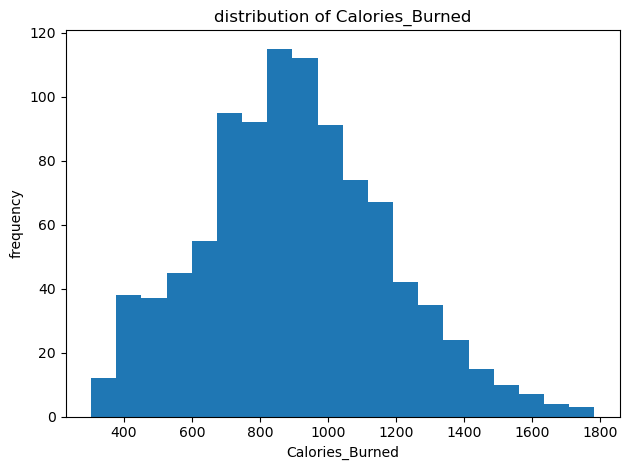

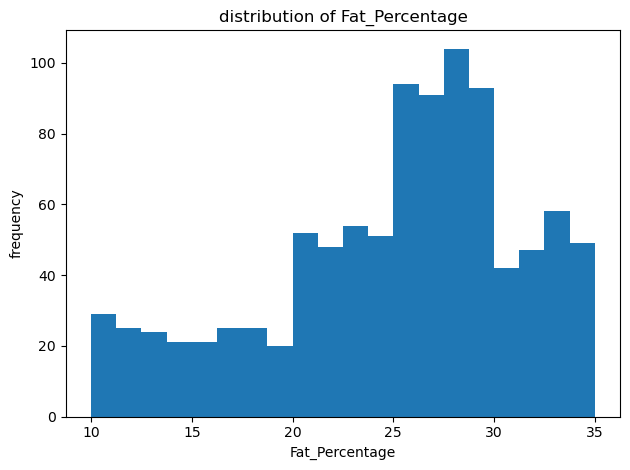

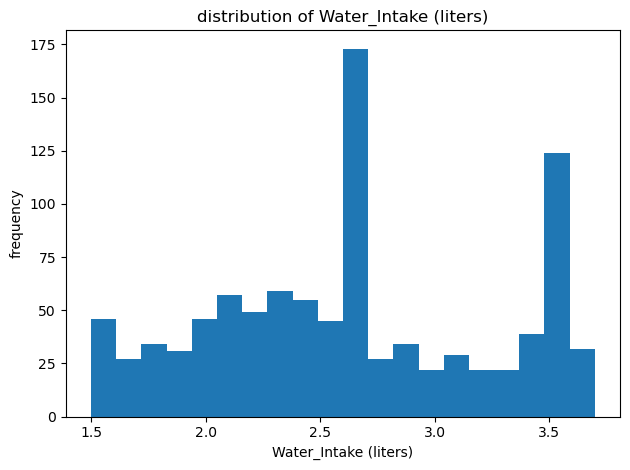

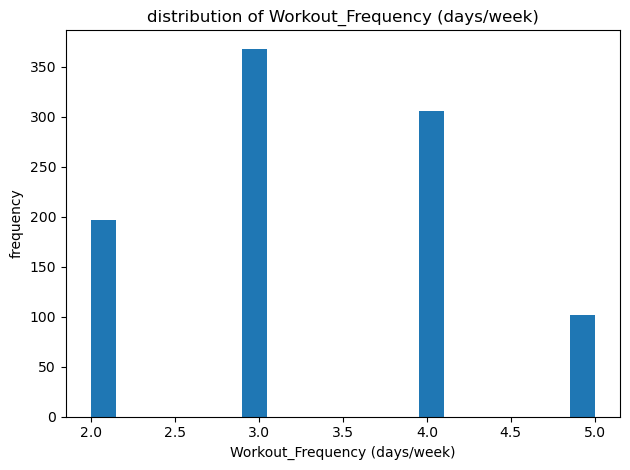

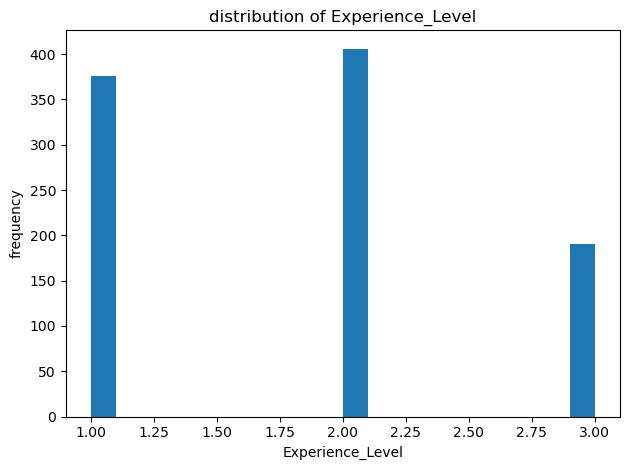

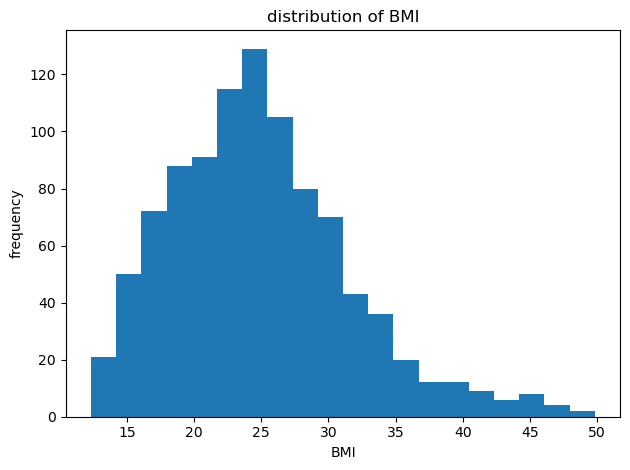

In [ ]:
numericCols = exerciseData.select_dtypes(include='number').columns #makes sure we are only looking at quantitative data to plot

for col in numericCols:
    plt.figure()
    exerciseData[col].hist(bins=20)
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

In [5]:
#feature engineering an efficiency stat for calories burned per hour.
exerciseData['Calorie_Efficiency'] = exerciseData['Calories_Burned'] / exerciseData['Session_Duration (hours)']

exerciseData[['Calories_Burned', 'Session_Duration (hours)', 'Calorie_Efficiency']]

,Calories_Burned,Session_Duration (hours),Calorie_Efficiency
0,1313.0,1.69,776.923077
1,883.0,1.30,679.230769
2,677.0,1.11,609.909910
3,532.0,0.59,901.694915
4,556.0,0.64,868.750000
...,...,...,...
968,1364.0,1.57,868.789809
969,1260.0,1.38,913.043478
970,929.0,1.72,540.116279
971,883.0,1.10,802.727273


In [6]:
correlationMatrix = exerciseData.corr(numeric_only=True)
correlationMatrix

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Calorie_Efficiency
Age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.018676,-0.013691,-0.334258
Weight (kg),-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.003379,0.853158,0.260520
Height (m),-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.010267,-0.159469,0.222949
Max_BPM,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.000545,0.067105,-0.008269
Avg_BPM,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,-0.000888,0.021605,0.810482
Resting_BPM,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,0.001758,-0.032543,0.057929
Session_Duration (hours),-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,0.764768,-0.006493,0.009004
Calories_Burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.694129,0.059761,0.411253
Fat_Percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.654363,-0.119258,-0.171970
Water_Intake (liters),0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.304104,0.213697,0.243563


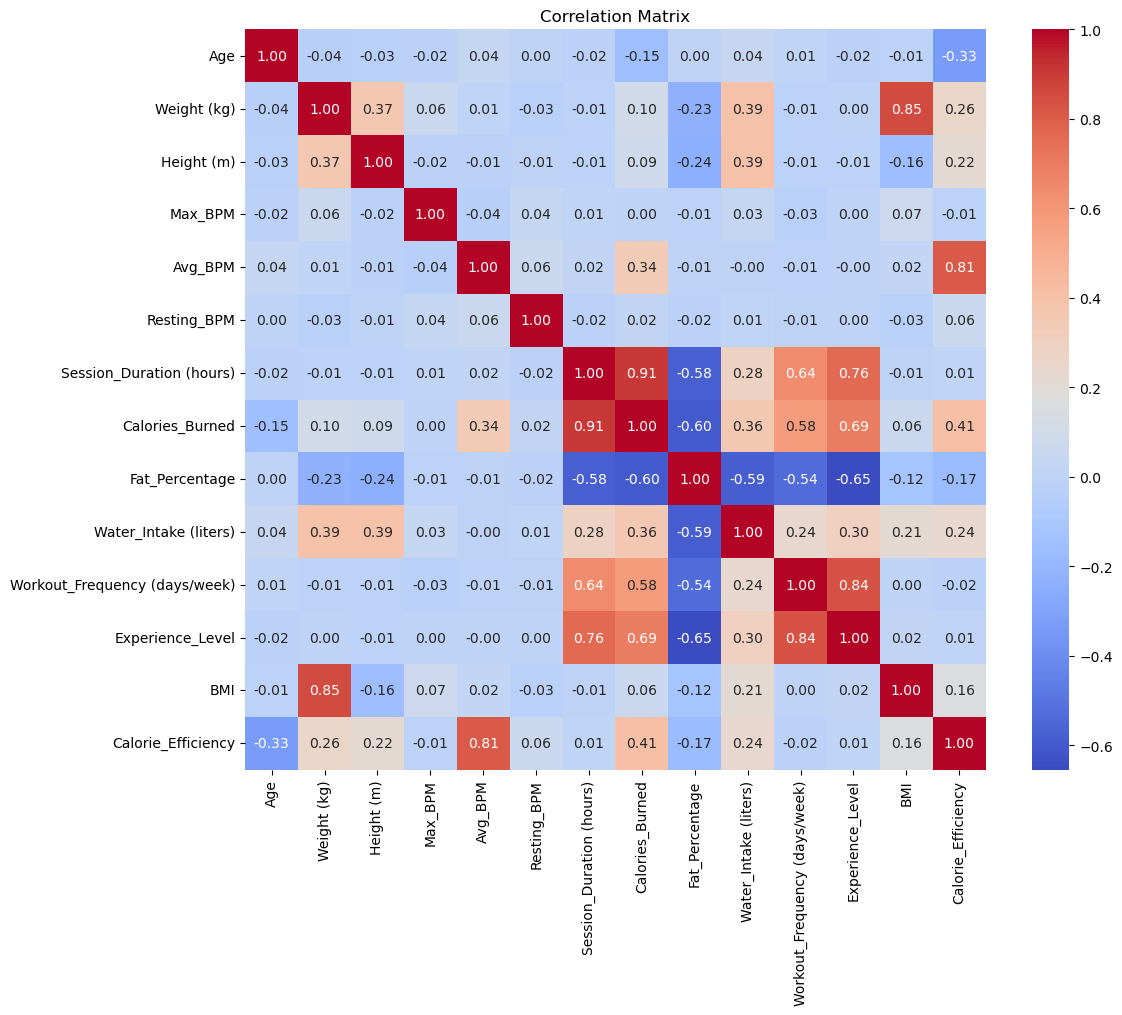

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlationMatrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

<Axes: xlabel='Workout_Type', ylabel='Calories_Burned'>

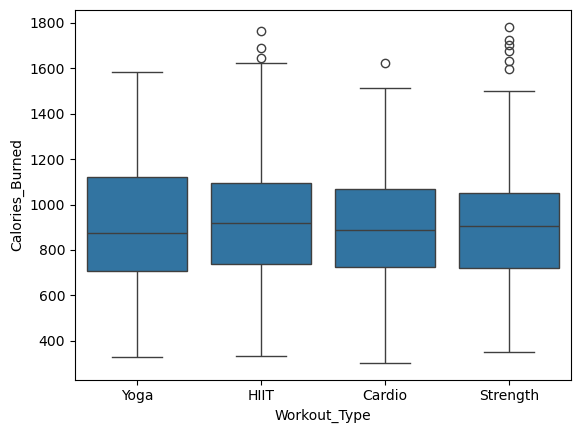

In [8]:
sns.boxplot(data=exerciseData, x='Workout_Type', y='Calories_Burned')

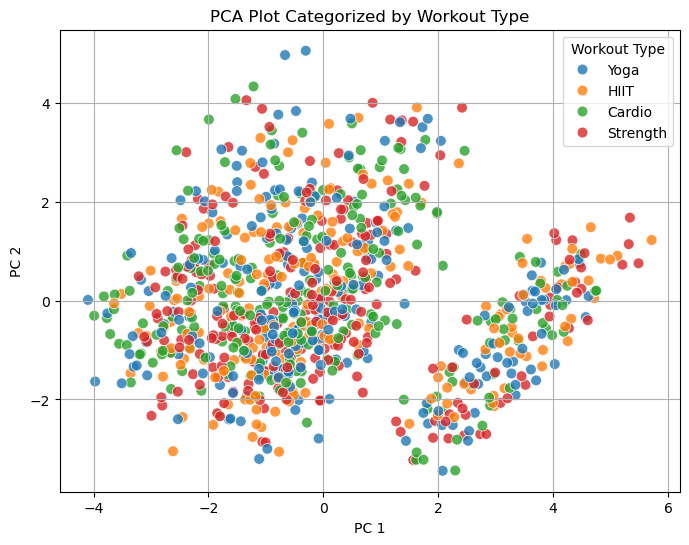

In [24]:
numericCols = exerciseData.select_dtypes(include='number').columns
X = exerciseData[numericCols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
df = exerciseData[numericCols].dropna()
workout_types = exerciseData.loc[df.index, 'Workout_Type']


plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=workout_types, s=60, alpha=0.8)
plt.title('PCA Plot Categorized by Workout Type')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title='Workout Type')
plt.grid(True)
plt.show()

In [ ]:
#Linear model with everything
X = exerciseData.drop(columns=['Calories_Burned'])
y = exerciseData['Calories_Burned']

X = pd.get_dummies(X, columns=['Gender', 'Workout_Type'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

lr = LinearRegression() #intializing the model
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred) #r^2 value
rmse = mean_squared_error(y_test, y_pred, squared=False) # residual mse 
r2, rmse

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.9870223849426097, 29.7719816613011)

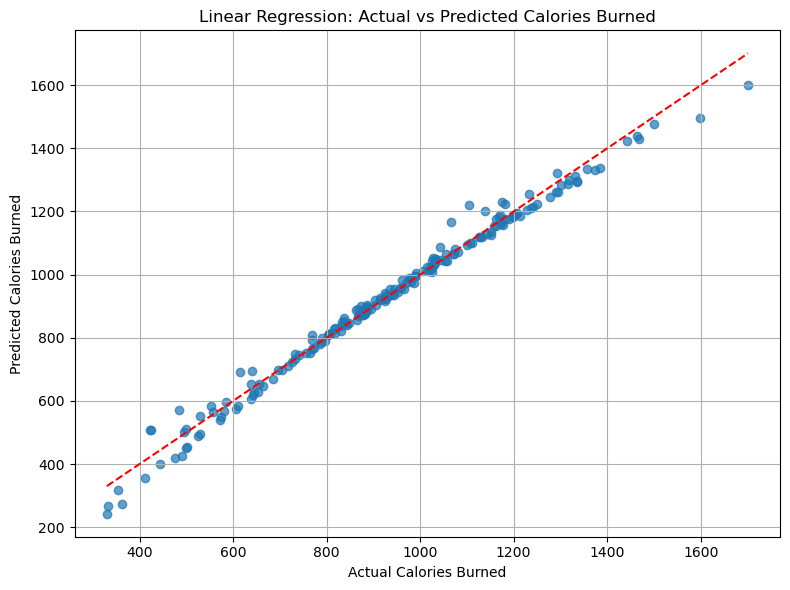

In [11]:
#plotted model
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Linear Regression: Actual vs Predicted Calories Burned')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
#lasso model
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

r2_lasso, rmse_lasso


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.9869868501215041, 29.812714061787155)

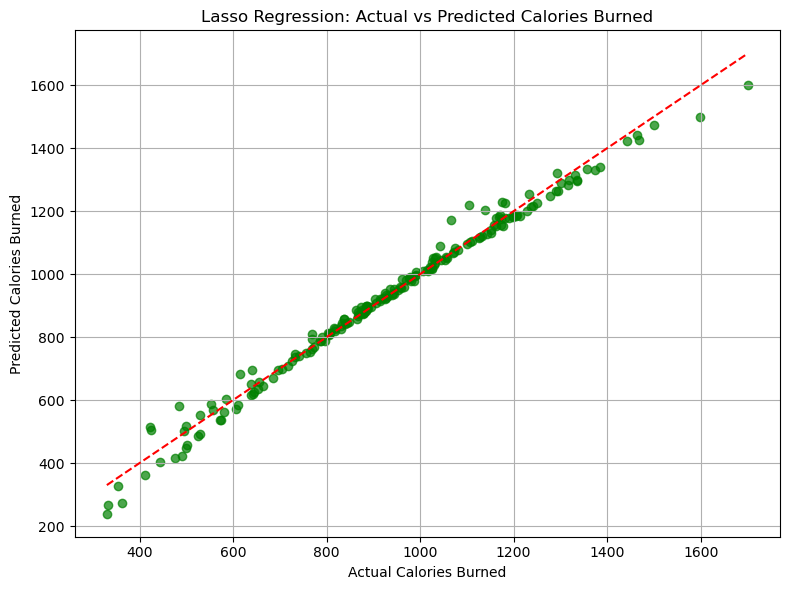

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Lasso Regression: Actual vs Predicted Calories Burned')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
selected_features = lasso_coefficients[lasso_coefficients != 0]
selected_features


Age                               -0.065948
Weight (kg)                        0.056278
Max_BPM                           -0.078030
Avg_BPM                            0.056002
Resting_BPM                        0.379891
Session_Duration (hours)         717.122769
Fat_Percentage                    -0.056484
Water_Intake (liters)              0.905995
Workout_Frequency (days/week)      0.353208
BMI                               -0.140363
Calorie_Efficiency                 1.244391
Workout_Type_HIIT                  1.979463
Workout_Type_Strength             -2.174819
Workout_Type_Yoga                 -3.014400
dtype: float64

In [ ]:
X = exerciseData[['Age', 'Weight (kg)', 'Session_Duration (hours)', 'Workout_Frequency (days/week)', 'Workout_Type']]
y = exerciseData['Calories_Burned']
X = pd.get_dummies(X, columns=['Workout_Type'], drop_first=False)

X = X.dropna()
y = y.loc[X.index]

X, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

lr = LinearRegression() 
lr.fit(X, y_train)

y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred) 
rmse = mean_squared_error(y_test, y_pred, squared=False) 

r2, rmse


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.8375046083508115, 105.34909843142798)

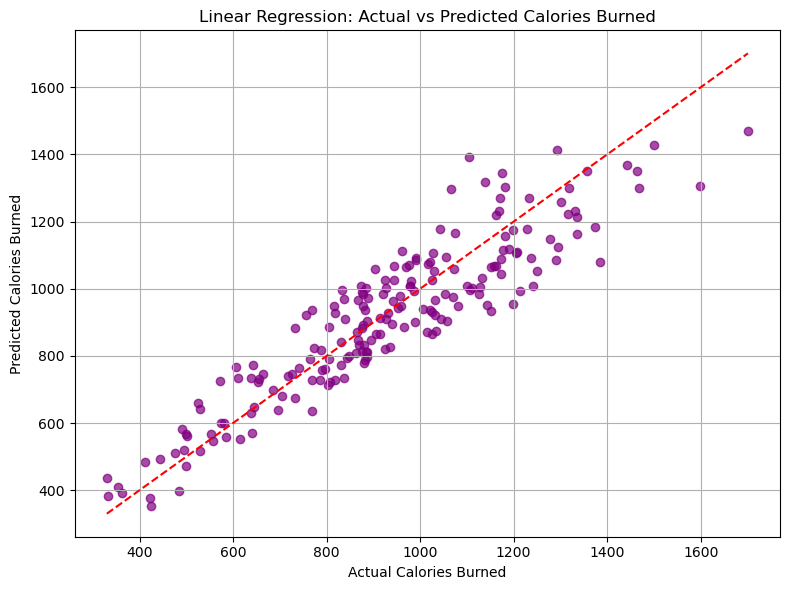

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Linear Regression: Actual vs Predicted Calories Burned')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#fresh load just to be safe
X = exerciseData[['Age', 'Weight (kg)', 'Session_Duration (hours)', 'Workout_Frequency (days/week)', 'Workout_Type']]
y = exerciseData['Calories_Burned']

X = pd.get_dummies(X, columns=['Workout_Type'], drop_first=False)

X = X.dropna()
y = y.loc[X.index]

#prediction function for linear regression
def predict_calories_linear(age, weight, session_duration, workout_frequency, workout_type):
    """Takes args and returns a prediction from a linear regression model.

    Args:
        age (int): age of user
        weight (float): weight of user
        session_duration (float): how much time in hours the session is
        workout_frequency (int): how many times a week does the user workout
        workout_type (string):  Whether the  workout was Yoga, High Intensity Interval Training, Strength, or Cardio

    Returns:
        float: _description_
    """
    #all the inputs we use to predict with our metrics
    input_data = {
        'Age': age,
        'Weight (kg)': weight,
        'Session_Duration (hours)': session_duration,
        'Workout_Frequency (days/week)': workout_frequency,
        'Workout_Type_Cardio': 0,
        'Workout_Type_HIIT': 0,
        'Workout_Type_Strength': 0,
        'Workout_Type_Yoga': 0
    }
    #selected workout type
    workout_col = f'Workout_Type_{workout_type}'
    if workout_col in input_data:
        input_data[workout_col] = 1

    input_df = pd.DataFrame([input_data])
    prediction = lr.predict(input_df)[0]
    return round(prediction, 2)

pickle.dump(lr, open('linear_model_all_types.pkl', 'wb')) #easy to work with inside its own workspace
predict_calories_linear(25, 70, 1.5, 4, 'Cardio')


1110.32

In [18]:

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X, y)
#same prediction function just for lasso 
def predict_calories_lasso(age, weight, session_duration, workout_frequency, workout_type):
    """Takes args and returns a prediction from a lasso regression model.

    Args:
        age (int): age of user
        weight (float): weight of user
        session_duration (float): how much time in hours the session is
        workout_frequency (int): how many times a week does the user workout
        workout_type (string):  Whether the  workout was Yoga, High Intensity Interval Training, Strength, or Cardio

    Returns:
        float: _description_
    """
    input_data = {
        'Age': age,
        'Weight (kg)': weight,
        'Session_Duration (hours)': session_duration,
        'Workout_Frequency (days/week)': workout_frequency,
        'Workout_Type_Cardio': 0,
        'Workout_Type_HIIT': 0,
        'Workout_Type_Strength': 0,
        'Workout_Type_Yoga': 0
    }
    workout_col = f'Workout_Type_{workout_type}'
    if workout_col in input_data:
        input_data[workout_col] = 1

    input_df = pd.DataFrame([input_data])
    prediction = lasso_model.predict(input_df)[0]
    return round(prediction, 2)

pickle.dump(lasso_model, open('lasso_model_all_types.pkl', 'wb'))
predict_calories_lasso(25, 70, 1.5, 4, 'Cardio')


1116.17

In [19]:
#gradient boosting model (gbm)
X_train_gbm, X_test_gbm, y_train_gbm, y_test_gbm = train_test_split(X, y, test_size=0.2, random_state=35)

gbm = GradientBoostingRegressor(n_estimators=50, learning_rate=0.2, max_depth=3, random_state=35) #decent amount of trees, low learning rate, and low depth to not overfit this data.
gbm.fit(X_train_gbm, y_train_gbm)

y_pred_gbm = gbm.predict(X_test_gbm)
r2_gbm = r2_score(y_test_gbm, y_pred_gbm)
rmse_gbm = mean_squared_error(y_test_gbm, y_pred_gbm, squared=False)

r2_gbm, rmse_gbm

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.8426395625667169, 103.67118815266222)

In [20]:
#same prediction model just made for gbm
def predict_calories_gbm(age, weight, session_duration, workout_frequency, workout_type):
    """Takes args and returns a prediction from a gradient boosting model.

    Args:
        age (int): age of user
        weight (float): weight of user
        session_duration (float): how much time in hours the session is
        workout_frequency (int): how many times a week does the user workout
        workout_type (string):  Whether the  workout was Yoga, High Intensity Interval Training, Strength, or Cardio

    Returns:
        float: _description_
    """
    input_data = {
        'Age': age,
        'Weight (kg)': weight,
        'Session_Duration (hours)': session_duration,
        'Workout_Frequency (days/week)': workout_frequency,
        'Workout_Type_Cardio': 0,
        'Workout_Type_HIIT': 0,
        'Workout_Type_Strength': 0,
        'Workout_Type_Yoga': 0
    }
    
    workout_col = f'Workout_Type_{workout_type}'
    if workout_col in input_data:
        input_data[workout_col] = 1
    
    input_df = pd.DataFrame([input_data])
    prediction = gbm.predict(input_df)[0]
    return round(prediction, 2)

pickle.dump(gbm, open('gradient_boosting_model.pkl', 'wb'))
predict_calories_gbm(25, 70, 1, 3, 'Cardio')

717.78

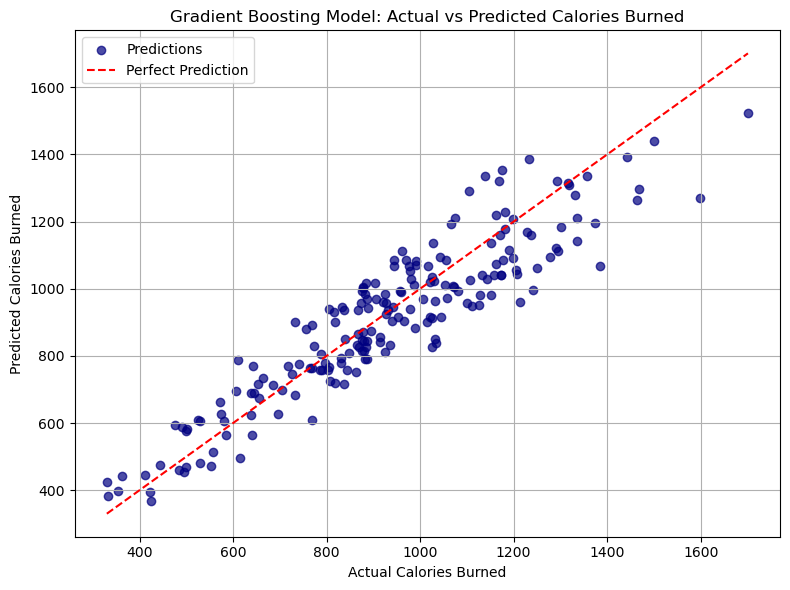

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_gbm, y_pred_gbm, alpha=0.7, color='navy', label='Predictions')
plt.plot([y_test_gbm.min(), y_test_gbm.max()], [y_test_gbm.min(), y_test_gbm.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Gradient Boosting Model: Actual vs Predicted Calories Burned')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()